In [383]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [384]:
Housing_data=pd.read_csv("C:/Users/Salma/Downloads/Housing-1.csv") #reading csv file

In [385]:
Housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [386]:
Housing_data.isnull().sum() #checking if there are null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [387]:
features = Housing_data.drop(columns=['price'])
price = Housing_data['price']  #[] 1D array

In [388]:
features.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [389]:
columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']  # Replace with your actual binary feature names

# Loop through each binary feature and print the counts
for column in columns:
    print(f"Counts for {column}:")
    print(features[column].value_counts())
    print()  # New line for better readability

Counts for area:
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64

Counts for bedrooms:
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

Counts for bathrooms:
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

Counts for stories:
2    238
1    227
4     41
3     39
Name: stories, dtype: int64

Counts for mainroad:
yes    468
no      77
Name: mainroad, dtype: int64

Counts for guestroom:
no     448
yes     97
Name: guestroom, dtype: int64

Counts for basement:
no     354
yes    191
Name: basement, dtype: int64

Counts for hotwaterheating:
no     520
yes     25
Name: hotwaterheating, dtype: int64

Counts for airconditioning:
no     373
yes    172
Name: airconditioning, dtype: int64

Counts for parking:
0    299
1    126
2    108
3     12
Name: parking, dtype: int64

Counts for prefarea:
no     417
yes    128
Name: prefarea, dtype

In [390]:
#maping values
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']  # Replace with your actual binary feature names

for c in columns:
    features[c] = features[c].map({'yes': 1, 'no': 0})
features['furnishingstatus'] = features['furnishingstatus'].map({'semi-furnished': 3, 'unfurnished': 2, 'furnished': 1})

In [391]:
features.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,3
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1


In [392]:
price.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [393]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=True)

In [394]:
#normalization
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

In [395]:
X_train_tensor = torch.FloatTensor(X_trainS)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_testS)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

In [396]:
#structure of the neural network
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super(LinearRegressionNN, self).__init__()
        self.layer1 = nn.Linear(12, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128,64)
        self.layer4 = nn.Linear(64, 32)  
        self.layer5 = nn.Linear(32, 1)   

    def forward(self, x):
        x = torch.relu(self.layer1(x))  
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = self.layer5(x)             
        return x

In [397]:
model = LinearRegressionNN()

In [398]:
Loss_F = nn.MSELoss() #loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizer

In [399]:
epochs = 3100   # number of epochs to run
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = Loss_F(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 100/3100, Loss: 25993613934592.0
Epoch 200/3100, Loss: 22173221650432.0
Epoch 300/3100, Loss: 4591896231936.0
Epoch 400/3100, Loss: 1810150457344.0
Epoch 500/3100, Loss: 1376368197632.0
Epoch 600/3100, Loss: 1202945654784.0
Epoch 700/3100, Loss: 1100117180416.0
Epoch 800/3100, Loss: 1029098045440.0
Epoch 900/3100, Loss: 976112517120.0
Epoch 1000/3100, Loss: 935336280064.0
Epoch 1100/3100, Loss: 902354894848.0
Epoch 1200/3100, Loss: 874635264000.0
Epoch 1300/3100, Loss: 851513901056.0
Epoch 1400/3100, Loss: 831592398848.0
Epoch 1500/3100, Loss: 814307213312.0
Epoch 1600/3100, Loss: 798970150912.0
Epoch 1700/3100, Loss: 784867262464.0
Epoch 1800/3100, Loss: 771986948096.0
Epoch 1900/3100, Loss: 760101863424.0
Epoch 2000/3100, Loss: 749086900224.0
Epoch 2100/3100, Loss: 739153805312.0
Epoch 2200/3100, Loss: 730447347712.0
Epoch 2300/3100, Loss: 722342903808.0
Epoch 2400/3100, Loss: 714837524480.0
Epoch 2500/3100, Loss: 707777855488.0
Epoch 2600/3100, Loss: 700923641856.0
Epoch 2700/

In [400]:
model.eval()
with torch.no_grad():
    
    y_test_pred = model(X_test_tensor)
    

test_mse = mean_squared_error(y_test, y_test_pred.numpy())
test_r2 = r2_score(y_test, y_test_pred.numpy())
test_mae = mean_absolute_error(y_test, y_test_pred.numpy())

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

Test MSE: 1462607646235.4792
Test MAE: 852991.6697247706
Test R²: 0.6516933676250144


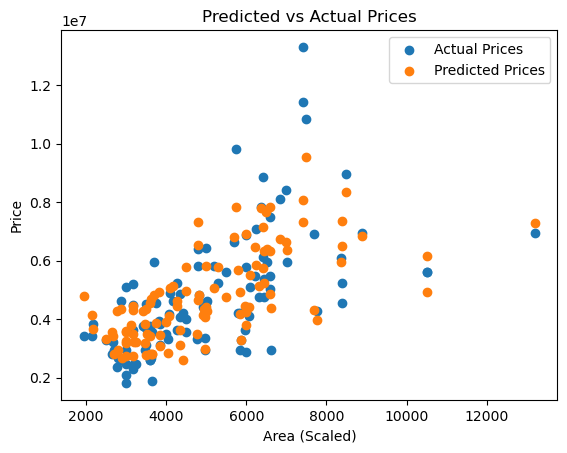

In [401]:
X_test=X_test[['area']]
plt.scatter(X_test, y_test, label='Actual Prices')
plt.scatter(X_test, y_test_pred.numpy(), label='Predicted Prices')
plt.xlabel('Area (Scaled)')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()